# (Dé)Montrez numériquement que même si 𝑠 ̂^2=𝑛/(𝑛−1) 𝑠^2  est un estimateur non biaisé de la variance 𝜎^2  de la population, 𝑠 ̂=√(𝑛/(𝑛−1) 𝑠^2 ) reste un estimateur biaisé de 𝜎!


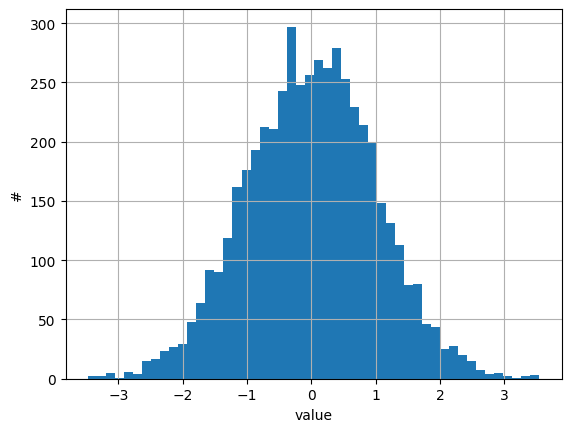

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
import math

population_size = 5000
sigma = 1
center = 0

population_df = pd.DataFrame()
population_df['value'] = np.random.normal(size=population_size, loc=center, scale=sigma)

population_df['value'].hist(bins=50)
plt.xlabel('value')
plt.ylabel('#')
plt.show()

Au sein de cette population fixée, nous allons tiré 500 échantillons de taille 5 sans remplacement et, pour chaque échantillon, calculer la variance
'normale'

In [29]:
n_samples = 500
sample_size = 5

var_df = pd.DataFrame()

random.seed(4242)
max_seed = 2**32-1

i_sample_list = range(0, n_samples)
var_list = []

for i_sample in i_sample_list:
    sample_df = population_df.sample(sample_size, random_state=random.randint(0,max_seed))
    var_list.append(np.var(sample_df['value']))

var_df = pd.DataFrame()
var_df['i_sample'] = i_sample_list
var_df['var'] = var_list

var_df

,i_sample,var
0,0,1.799181
1,1,0.081102
2,2,1.359394
3,3,0.643215
4,4,1.519298
...,...,...
495,495,0.052290
496,496,0.190474
497,497,0.143905
498,498,0.678974


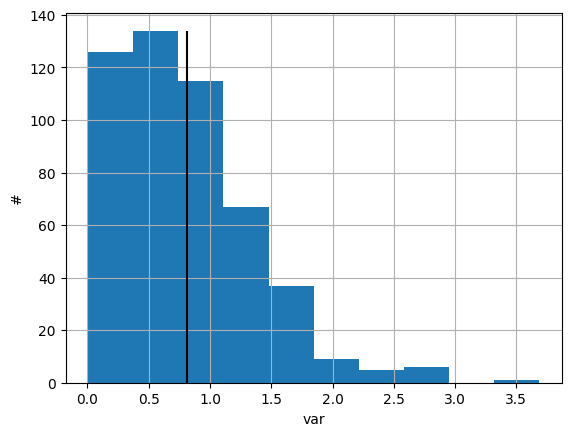

np.float64(0.8085197122069391)

In [30]:
var_df['var'].hist()

mean_var = var_df['var'].mean()
plt.vlines(mean_var, ymin=0, ymax=np.histogram(var_df['var'])[0].max(), color='black')
plt.xlabel('var')
plt.ylabel('#')
plt.show()

mean_var

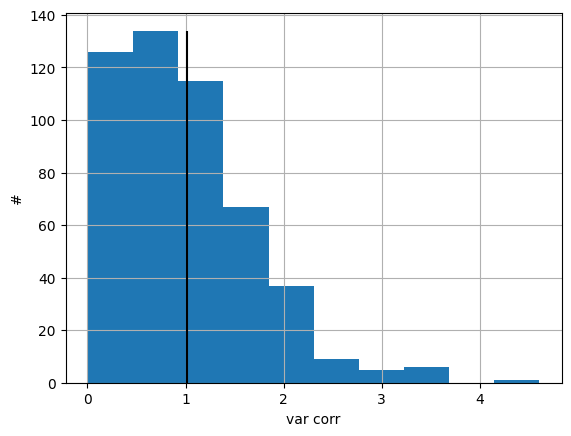

,i_sample,var,var corr
0,0,1.799181,2.248977
1,1,0.081102,0.101377
2,2,1.359394,1.699242
3,3,0.643215,0.804019
4,4,1.519298,1.899122


In [31]:
var_df['var corr'] = var_df['var']*sample_size/(sample_size-1)

var_df['var corr'].hist()
plt.vlines(var_df['var corr'].mean(),ymin=0,ymax=np.histogram(var_df['var corr'])[0].max(),color='black')
plt.xlabel('var corr')
plt.ylabel('#')
plt.show()

var_df.head()

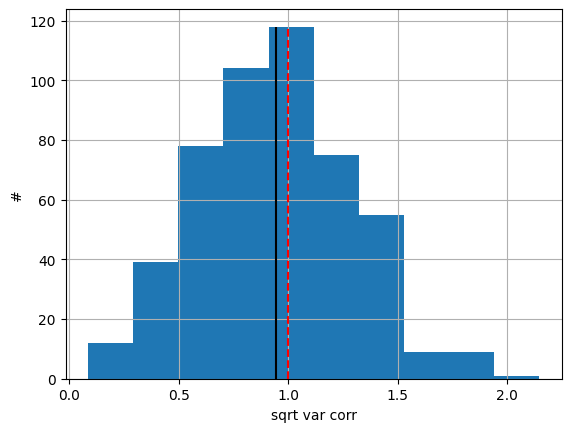

In [32]:
var_df['sqrt var corr'] = var_df.apply(lambda r:math.sqrt(r['var corr']), axis=1)

var_df['sqrt var corr'].hist()
plt.vlines(var_df['sqrt var corr'].mean(), ymin=0, ymax=np.histogram(var_df['sqrt var corr'])[0].max(), color='black')
plt.vlines(sigma, ymin=0, ymax=np.histogram(var_df['sqrt var corr'])[0].max(), color='red', linestyles='dashed')
plt.xlabel('sqrt var corr')
plt.ylabel('#')
plt.show()

On voit clairement que la moyenne de cet estimateur ne correspond PAS au sigma de la population qui vaut 1!!!  
Donc, on a encore et toujours un estimateur biaisé!!!